## 1. Data of Interests

### In the proposal, most projects only focus on a subset of data. Please state the subset of data to explore again here.

The goal of our project is to explore the relationship between food cuisines (Italian, French, Mexican, Chinese, etc) and consumer ratings relative to the time of day. In order to do this, we will use yelp's dataset. Our subset of will contain all the restaurants on yelp with the tag 'restaurant' as a category in 'business.json' and the corresponding reviews associated with them in 'tip.json'

## 2. Data Preprocessing

### Describe what preprocessing is done. This includes details of cleaning and reorganization.

For preprocessing, we first extracted all the businesses from business.json to filter for restaurants. Initially, the tags were all embedded in a string, so we were able to clean the dataset by parsing each category list and converted them into a list of category by delminating the string. We did some prelimary analysis to seach for the most common categories in the dataset and concluded the most common but still relevant category were 'restaurants'. The tag for 'food' contained entries such as grocery stores, and thus was ommited. From there we collected all the entries with those tags and gathered their 'business_id', and retrieved all the coresponding reviews from 'tip.json'. We also noticed from EDA testing that the times for each tip were in GMT, so we converted the GMT times into local times.

In [1]:
# load dataset
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from timezonefinder import TimezoneFinder

In [3]:
filepath = '../../yelp_dataset'

business = []
for l in open(filepath+"/business.json", encoding="utf8").readlines():
    business.append(json.loads(l))
df_business = pd.DataFrame.from_records(business)

tips = []
for l in open(filepath+"/tip.json", encoding="utf8").readlines():
    tips.append(json.loads(l))
df_tip = pd.DataFrame.from_records(tips) 

In [4]:
# Find business categories
categories = {}
for _, row in df_business.iterrows():
    if row.categories:
        row_categories = row.categories.split(', ')
        for category in row_categories:
            if category not in categories:
                categories[category] = 1
            else:
                categories[category] += 1
categories = {k: v for k, v in sorted(categories.items(), key=lambda item: item[1])}


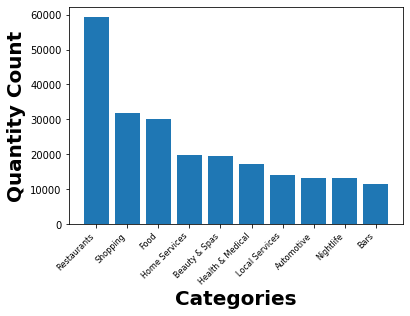

In [5]:
# Top 10 categories
top_10 = dict(list(categories.items())[-10:]) 

x = list(top_10.keys())
x.reverse()
x = np.array(x)
y = list(top_10.values())
y.reverse()
y = np.array(y)


fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, x, color='black', rotation=45, fontsize='8', horizontalalignment='right')
plt.xlabel("Categories", fontweight='bold', fontsize='20')
plt.ylabel("Quantity Count", fontweight='bold', fontsize='20')

plt.show()

In [6]:
# OLD VERSION THAT INCLUDED FOOD

# Filter businesses that are only in the 'Food' or 'Restaurant' category
def check_for_rest_or_food(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Food' in tokens or 'Restaurants' in tokens
    return False

# df_business['is_restaurant_or_food'] = df_business.apply(check_for_rest_or_food, axis=1)

# food_businesses = df_business[df_business['is_restaurant_or_food'] == True]

In [7]:
# Filter businesses that are only in the 'Food' or 'Restaurant' category
def check_for_rest(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Restaurants' in tokens
    return False

df_business['is_restaurant'] = df_business.apply(check_for_rest, axis=1)

food_businesses = df_business[df_business['is_restaurant'] == True]

# Get the unique IDs for all the businesses that are resturaunts
restaurant_ids  = set(food_businesses['business_id'].unique())

print('Total Unique ID count:',len(restaurant_ids))

Total Unique ID count: 59371


In [8]:
# Get count of total number of reviews per business
df_rest_tip = df_tip[df_tip['business_id'].isin(restaurant_ids)]

print('Total Number of Tips With Resturaunt tag:', len(df_rest_tip))

Total Number of Tips With Resturaunt tag: 810342


In [9]:
# Convert from GMT time zone to local time zone
# Add local time to dataframe 
tf = TimezoneFinder()
time_zone_from_utc = {
'America/Phoenix': -7, 
'America/Los_Angeles': -7, 
'America/Toronto': -5 , 
'America/New_York' : -5, 
'America/Chicago': -6 , 
'America/Edmonton':  -7
}
counter = 0

def extract_hour(date_time):
    date_time_list = date_time.split()
    time_list = date_time_list[-1].split(':')
    return int(time_list[-3])

def get_local_hour(row):
    business_id = row['business_id']
    business = food_businesses[food_businesses['business_id'] == business_id]
    latitude = list(business['latitude'])[0]
    longitude = list(business['longitude'])[0]
    time_zone = tf.timezone_at(lng=longitude, lat=latitude)
    normalized_hour = extract_hour(row['date'])
    local_hour = normalized_hour + time_zone_from_utc[time_zone]
    if local_hour < 0:
        local_hour = 24 + local_hour
    global counter
    counter += 1
    if (counter % 500) == 0: 
        print(counter)
    return local_hour

df_rest_tip['local_hour'] = df_rest_tip.apply(get_local_hour, axis=1)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
85000


601500
602000
602500
603000
603500
604000
604500
605000
605500
606000
606500
607000
607500
608000
608500
609000
609500
610000
610500
611000
611500
612000
612500
613000
613500
614000
614500
615000
615500
616000
616500
617000
617500
618000
618500
619000
619500
620000
620500
621000
621500
622000
622500
623000
623500
624000
624500
625000
625500
626000
626500
627000
627500
628000
628500
629000
629500
630000
630500
631000
631500
632000
632500
633000
633500
634000
634500
635000
635500
636000
636500
637000
637500
638000
638500
639000
639500
640000
640500
641000
641500
642000
642500
643000
643500
644000
644500
645000
645500
646000
646500
647000
647500
648000
648500
649000
649500
650000
650500
651000
651500
652000
652500
653000
653500
654000
654500
655000
655500
656000
656500
657000
657500
658000
658500
659000
659500
660000
660500
661000
661500
662000
662500
663000
663500
664000
664500
665000
665500
666000
666500
667000
667500
668000
668500
669000
669500
670000
670500
671000
671500
672000
672500

/Users/leannahue/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
df_rest_tip.to_json('./restaurant_tips.json', orient='records')

In [11]:
print(df_rest_tip)

                        user_id             business_id  \
0        UPw5DWs_b-e2JRBS-t37Ag  VaKXUpmWTTWDKbpJ3aQdMw   
1        Ocha4kZBHb4JK0lOWvE0sg  OPiPeoJiv92rENwbq76orA   
2        jRyO2V1pA4CdVVqCIOPc1Q  5KheTjYPu1HcQzQFtm4_vw   
3        FuTJWFYm4UKqewaosss1KA  TkoyGi8J7YFjA6SbaRzrxg   
5        iAd8XaHxv05iXyEiZ62Ibw  kj1p6NwUGROOoqNySf0I1Q   
...                         ...                     ...   
1223087  mkbx55W8B8aPLgDqex7qgg  OMRYQihVjqqzjoNoQgyhgQ   
1223088  I4umcf3wmdLNms8ku9zwGA  MqYYYNA-ZYvV-1w5qcmMoA   
1223090  95wqYGU6-OiHqRPZP0uAWw  wrs4Zbz17q_G49AIRxRPVw   
1223091  HtLaONYabidSxMS1eGHcXA  wEc4JE2NYQr1RnGjGr4q7w   
1223092  T4R5ZKfcGt1GIAgjCh67eA  n5Hc_iMVkyxcS0SXiBCbOQ   

                                                      text  \
0        Great for watching games, ufc, and whatever el...   
1        Happy Hour 2-4 daily with 1/2 price drinks and...   
2        Good chips and salsa. Loud at times. Good serv...   
3        The setting and decoration here is

## 3. EDA

### Describe in detail what EDA and Statistical Testing are performed. You should perform at least three meaningful plots/testings. Please also summarize the insights from EDA.

#### Quick Aside About Project Scope

Initially, our goal of our project was to identify "Which cuisines are most positively received in certain region (West, Midwest, Northeast, and South) of the continental United States?” The subset of data that we initially exploredwas  the yelp dataset in business.json for entries in the continental United States only. (All US states except Alaska and Hawaii, not including Washington D.C.). The states will be divided up by region National Geographic's guideline for United States regions (https://www.nationalgeographic.org/maps/united-states-regions/). 

After examining the distributions of reviews for each region, we noticed that the data set was heavily skewed; some states such as Utah only had 1 review while others such as Arizona had 56000+. Because of this we had to modify our goal and scope of our original project to it's current goal.

Fortunately, due to EDA we were able to identify this issue and pivot the scope of our project right away

In [ ]:
# load dataset
import json
import pandas as pd

filepath = '../../yelp_dataset'

business = []
for l in open(filepath+"/business.json", encoding="utf8").readlines():
    business.append(json.loads(l))
df_business = pd.DataFrame.from_records(business)

# cleaning data for inconsistent state names

west = ['WA', 'OR', 'ID', 'MT', 'WY', 'CA', 'NV', 'UT', 'CO']
southwest = ['AZ', 'NM', 'OK', 'TX']
midwest = ['ND', 'SD', 'KS', 'MO', 'NE', 'IA', 'MN', 'WI', 'IL', 'MI', 'IN', 'OH']
northeast = ['ME', 'NH', 'VT', 'NY', 'RI', 'CT', 'MA', 'PA', 'NJ']
southeast = ['WV', 'MD', 'DE', 'VA', 'KY', 'NC', 'TN', 'SC', 'GA', 'AL', 'MS', 'AR', 'LA', 'FL']
states = west + southwest + midwest + northeast + southeast

states_mappings = {
    'WASHINGTON': 'WA', 
    'OREGON': 'OR', 
    'IDAHO': 'ID',
    'MONTANA': 'MT', 
    'WYOMING': 'WY', 
    'CALIFORNIA': 'CA', 
    'NEVADA': 'NV', 'UTAH': 'UT', 
    'COLORADO': 'CO',
    'ARIZONA': 'AZ', 
    'NEW MEXICO': 'NM', 
    'OKLAHOMA': 'OK', 
    'TEXAS': 'TX',
    'NORTH DAKOTA' : 'ND',
    'SOUTH DAKOTA' : 'SD',
    'KANSAS' : 'KS',
    'MONTANA' : 'MO',
    'NEBRASKA' : 'NE',
    'IOWA' : 'IA',
    'MINNESOTA' : 'MN',
    'WISCONSIN' : 'WI',
    'ILLINOIS' : 'IL',
    'MICHIGAN' : 'MI',
    'INDIANA' : 'IN',
    'OHIO' : 'OH',
    'MAINE' : 'ME',
    'NEW HAMPSHIRE' : 'NH',
    'VERMONT' : 'VT',
    'NEW YORK' : 'NY',
    'RHODE ISLAND' : 'RI',
    'CONNECTICUT' : 'CT',
    'MASSACHUSETTS' : 'MA',
    'PENNSYLVANIA' : 'PA',
    'NEW JERSEY' : 'NJ',
    'WEST VIRGINA' : 'WV',
    'MARYLAND' : 'MD',
    'DELAWARE' : 'DE',
    'VIRGINIA' : 'VA',
    'KENTUCKY' : 'KY',
    'NORTH CAROLINA' : 'NC',
    'TENNESSEE' : 'TN',
    'SOUTH CAROLINA' : 'SC',
    'GEORGIA' : 'GA',
    'ALABAMA' : 'AL',
    'MISSOURI' : 'MS', 
    'ARKANSAS' : 'AR', 
    'LOUISIANA' : 'LA', 
    'FLORIDA' : 'FL'
}

def convert_to_upper_abr(state):
    state = state.upper()
    if state in states_mappings:
        return states_mappings[state]
    return state

# convert all state entries to upper case and fix inconsistencies with states fully spelled our vs abb
for _, row in df_business.iterrows():
    row.state = convert_to_upper_abr(row.state)
    
# filter dataset by region
df_us_states = df_business.loc[df_business['state'].isin(states)]
print(df_us_states['state'].value_counts())
west_businesses = df_business.loc[df_business['state'].isin(west)]
south_businesses = df_business.loc[df_business['state'].isin(southwest)]
midwest_businesses = df_business.loc[df_business['state'].isin(midwest)]
northeast_businesses = df_business.loc[df_business['state'].isin(northeast)]
southeast_businesses = df_business.loc[df_business['state'].isin(southeast)]

# print('Total West:',len(west_businesses))
# print('Total South:',len(south_businesses))
# print('Total Midwest:',len(midwest_businesses))
# print('Total Northeast:',len(northeast_businesses))
# print('Total Southeast:',len(southeast_businesses))
import matplotlib.pyplot as plt 

plt.boxplot([west_businesses.stars, south_businesses.stars, midwest_businesses.stars, northeast_businesses.stars, southeast_businesses.stars])
plt.xticks([1, 2, 3, 4, 5], ['West', 'South', 'Midwest', 'Northeast', 'Southeast'])
plt.show()

From examining the boxplots and state review counts, even though the distributions of businesses are relatively similar, some of the datasets are too small to conduct meaningful analysis

#### Current Project's EDA

The second EDA test we performed was plotting a histogram showing the distribution of review count against timestamps for reviews in tip based on businesses with the restaurant tag 

In [ ]:
# Get tips and time of day reviewed]
def extract_time(row):
    date_time_list = row.split()
    time_list = date_time_list[-1].split(':')
    return int(time_list[-3])

tip_times = df_rest_tip.date.apply(extract_time)

In [ ]:
tip_times.plot.hist(bins=24)

Before plotting the histogram, we expected peaks of tips to be centered around meal times (9am, 12pm, and 6pm). However, the resulting histogram was unexpected as it shows most tips around 6pm-3am. One possible reason for this discrepancy is all tips were normalized to be in the GMT time zone. To account for this, we further preprocessed the data to convert all UTC times to the local times.

The third EDA test we performed was to check the how the tip counts per unique business_id are distrubuted via a PDF

In [ ]:
import matplotlib.pyplot as plt

tips_count = df_rest_tip['business_id'].value_counts()
tips_count = tips_count.value_counts()

x = np.array(tips_count.index.values)
y = np.array(tips_count.tolist())
total = np.sum(y)
y = np.true_divide(y, total)

plt.plot(x, y)
plt.xlabel('Review Count')
plt.ylabel('Percentage')
plt.title('Review Count PDF')
plt.show()

After visual inspection, the distribution seems to follow the Power Law. Now we will prove if this the distribution follows the Power Law or not

In [ ]:
plt.loglog(x,y)
plt.xlabel('Review Count Log Scale')
plt.ylabel('Percentage Log Scale')
plt.title('Review Count PDF Log Scale')
plt.show()

The relationship still seems relatively linear, but there is noise towards the end. We will now clean up the graph via binning

In [ ]:
counts, bins = np.histogram(y, bins = 190)

x_min_index = 2


bins=bins[x_min_index:]
counts = counts[x_min_index-1:]

plt.plot(bins,counts)
plt.xlabel('Review Count')
plt.ylabel('Percentage')
plt.title('Review Count PDF Bins=190')

In [ ]:
plt.plot(bins, counts)
plt.loglog(bins, counts, 'x')
plt.xlabel('Review Count Log Scale')
plt.ylabel('Percentage Log Scale')
plt.title('Review Count PDF Log Scale Bins=190')
plt.show()

In [ ]:
# Examining CCDF
counts2 = counts[::-1]
counts2 = np.cumsum(counts2)
counts2 = counts2[::-1]

plt.figure()
plt.plot(bins, counts2)
plt.loglog(bins, counts2, 'x')

In [ ]:
from scipy.stats import pearsonr
import powerlaw

# Examining Statistics

bins_log = np.log(bins)
counts2_log = np.log(counts2)

corr, _ = pearsonr(bins_log, counts2_log)
print('Pearsons correlation: %.3f' % corr)

data = counts2
results = powerlaw.Fit(data)
print("alpha =", results.power_law.alpha)

Given a Pearsons Correlation Coefficient of -.971 and an alpha of 2.5939319723571845, we can conclude that the relationsip is Very Strongly Negatively Correlated and that it follows a Power Law Curve. Now that we know that the distribution follows the Power Law, we can then use this knowledge in further analysis to help normalize our dataset. This can apply in cases where a restaurant with fewer total reviews can be more negatively biased by one negative review versus one negative review would not affect a restaurant with more total reviews.